In [1]:
#unzip downloaded files

#install library
!pip install zipfile36

#import library
import zipfile

#unzipping
train_data = zipfile.ZipFile('train.csv.zip')
test_data = zipfile.ZipFile('test.csv.zip')

#extract both data
train_data.extractall()
test_data.extractall()

#close both data
train_data.close()
test_data.close()


In [2]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#random sampling to reduce the size of datasets 
#select 10 percent of rows, can be changed
train_sampled = train.sample(frac = 0.1, random_state = 1)
test_sampled = test.sample(frac = 0.1, random_state = 1)

In [5]:
# #save sampled dataframe as new file
# train_sampled.to_csv('train_sampled.csv', index = False)
# test_sampled.to_csv('test_sampled.csv', index = False)


In [6]:
train_sampled.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
37477321,2014-09-13 17:23:58,11,3,205,354,21728,2183.8227,543652,0,0,...,0,1,8854,1,0,1,2,198,402,74
1022194,2014-11-17 19:56:32,11,3,205,385,46963,1843.0431,963724,0,0,...,0,1,8791,1,0,2,4,8,110,85
30836517,2014-05-09 18:45:52,2,3,66,337,43087,NaN,341444,0,0,...,0,1,32158,4,0,1,2,50,1507,13
10786538,2014-09-05 14:48:31,11,3,205,354,25315,43.5909,674104,0,0,...,1,1,14875,1,0,1,2,198,750,98
30467934,2013-04-01 12:02:18,11,3,47,22,9747,NaN,612958,1,0,...,0,1,22549,6,0,1,6,204,1761,61


In [7]:
test_sampled.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
1602422,1602422,2015-05-22 18:26:56,2,3,215,914,33757,5816.4927,524141,1,...,2015-07-03,2015-07-05,2,0,1,8234,1,6,7,8
2073388,2073388,2015-01-16 09:21:53,2,3,66,153,23511,2121.1750,890108,0,...,2015-03-05,2015-03-12,3,0,1,8267,1,2,50,675
64229,64229,2015-11-11 05:26:23,24,2,3,51,29673,NaN,215112,1,...,2016-05-02,2016-05-04,2,0,1,52437,6,3,182,46
1815303,1815303,2015-09-16 07:57:11,15,1,55,23,24874,NaN,27314,0,...,2015-11-06,2015-11-09,2,0,1,8252,1,6,170,313
2096148,2096148,2015-11-02 13:19:19,2,3,66,318,29466,7972.6709,965762,0,...,2015-11-17,2015-11-19,3,0,3,41323,1,3,104,84


In [8]:
train_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3767029 entries, 37477321 to 8763276
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  


In [9]:
test_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252824 entries, 1602422 to 246432
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         252824 non-null  int64  
 1   date_time                  252824 non-null  object 
 2   site_name                  252824 non-null  int64  
 3   posa_continent             252824 non-null  int64  
 4   user_location_country      252824 non-null  int64  
 5   user_location_region       252824 non-null  int64  
 6   user_location_city         252824 non-null  int64  
 7   orig_destination_distance  168190 non-null  float64
 8   user_id                    252824 non-null  int64  
 9   is_mobile                  252824 non-null  int64  
 10  is_package                 252824 non-null  int64  
 11  channel                    252824 non-null  int64  
 12  srch_ci                    252824 non-null  object 
 13  srch_co                

In [25]:
#data cleaning
#drop any columns that not using
train_cleaned = train_sampled.drop(['channel', 'date_time', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'cnt', 'srch_ci', 'srch_co'], axis = 1)
test_cleaned = test_sampled.drop(['channel', 'id', 'date_time', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'srch_ci', 'srch_co'], axis = 1)

#drop NaN
train_cleaned = train_cleaned.dropna()
test_cleaned = test_cleaned.dropna()

In [26]:
train_cleaned.head()

,site_name,posa_continent,user_id,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,hotel_continent,hotel_country,hotel_market,hotel_cluster
37477321,11,3,543652,0,0,2,0,1,8854,1,0,2,198,402,74
1022194,11,3,963724,0,0,2,0,1,8791,1,0,4,8,110,85
30836517,2,3,341444,0,0,2,0,1,32158,4,0,2,50,1507,13
10786538,11,3,674104,0,0,3,1,1,14875,1,0,2,198,750,98
30467934,11,3,612958,1,0,2,0,1,22549,6,0,6,204,1761,61


In [27]:
test_cleaned.head()

,site_name,posa_continent,user_id,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
1602422,2,3,524141,1,0,2,0,1,8234,1,6,7,8
2073388,2,3,890108,0,0,3,0,1,8267,1,2,50,675
64229,24,2,215112,1,0,2,0,1,52437,6,3,182,46
1815303,15,1,27314,0,1,2,0,1,8252,1,6,170,313
2096148,2,3,965762,0,0,3,0,3,41323,1,3,104,84


Data exploration

In [13]:
dest_cluster = train_cleaned.groupby(['srch_destination_id', 'hotel_cluster'])['is_booking'].agg(['count'])
dest_cluster.head(10)

count
srch_destination_id hotel_cluster       
1                   20                 3
                    30                 2
                    60                 2
3                   53                 1
4                   3                  2
                    22                 7
                    25                28
                    29                 2
                    30                13
                    32                12

<AxesSubplot:>

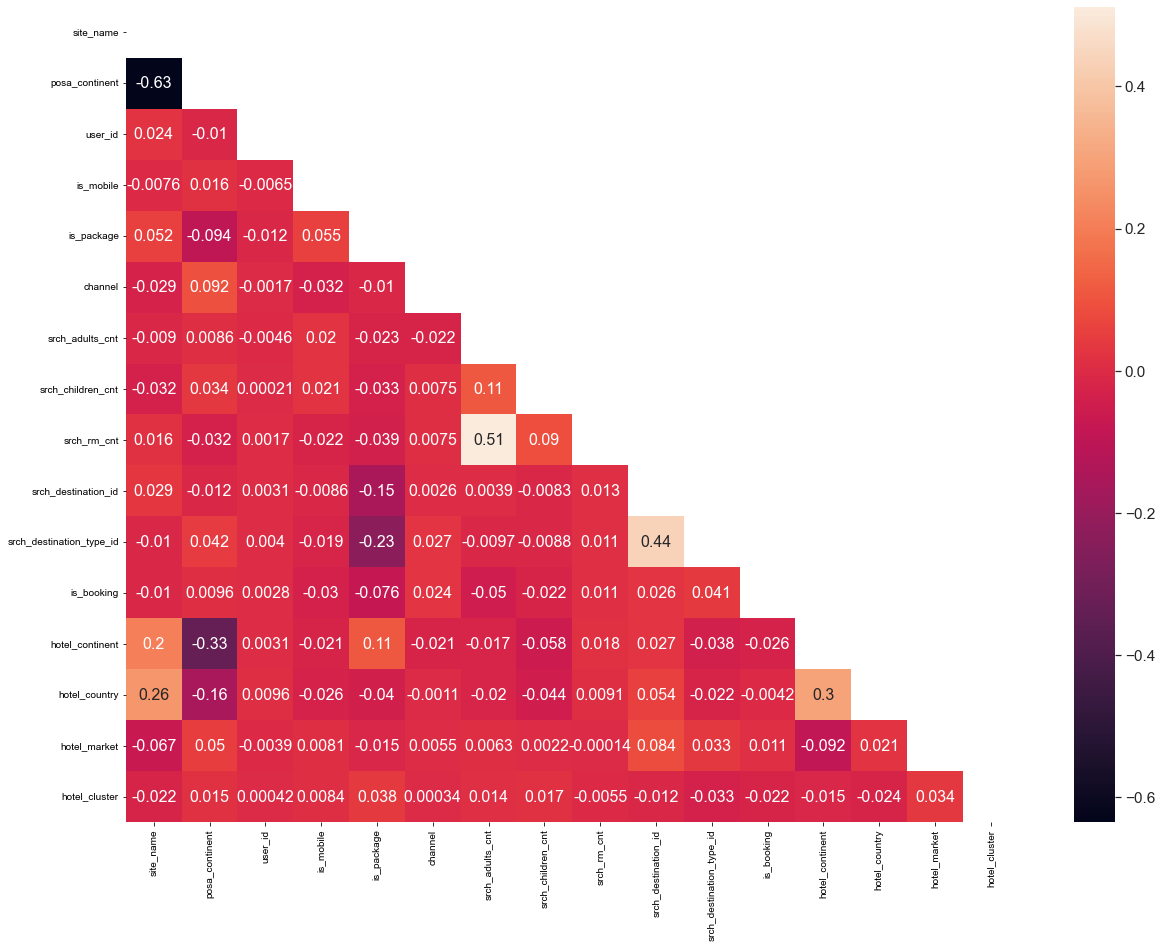

In [14]:
#create a correlation matrix to see relationship 
corr = train_cleaned.corr()

matrix = np.triu(corr)
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, mask=matrix, annot_kws={"size": 16})

In [15]:
# #thinking to find relationship of adults and children traveling decision making...
# print('Adults:', set(train_sampled['srch_adults_cnt'].tolist()))
# print('Children:', set(train_sampled['srch_children_cnt'].tolist()))

Train test split (not working...)

In [37]:
# # Separate the target variable from the features
# X_train = train_cleaned.drop('hotel_market', axis=1)
# Y_train = train_cleaned['hotel_market']
# X_test = test_cleaned.drop('hotel_market', axis=1)
# Y_test = test_cleaned['hotel_market']

# data = train_cleaned.iloc[:, :15]
# target = test_cleaned.iloc[:, 12]

X_train, X_test, Y_train, Y_test = train_test_split(train_sampled, test_sampled, test_size = 0.2)

ValueError: Found input variables with inconsistent numbers of samples: [3767029, 252824]

Logistic regression

In [35]:
#logistic regression as model
logreg = LogisticRegression()

#train the logistic model on train data
logreg.fit(X_train, Y_train)

#trained model to make predictions on the test data
Y_pred_logreg = logreg.predict(X_test)

#evaluate model's accuracy
logreg_accuracy = accuracy_score(Y_test, Y_pred_logreg)
print('Accuracy of Logistic Regression:', logreg_accuracy)

MemoryError: Unable to allocate 59.3 GiB for an array with shape (3767029, 2112) and data type int64

Naive bayes

In [ ]:
#naive bayes classifier
nbc = GaussianNB()

#train the classifier on train data
nbc.fit(X_train, Y_train)

#trained classifier to make predictions on test data
Y_pred_nbc = nbc.predict(X_test)

#evaluate classifier's accuracy
nbc_accuracy = accuracy_score(Y_test, Y_pred_nbc)
print("Accuracy of Naive Bayes:", nbc_accuracy)

K-mean clustering

K-nearest neighbors

In [ ]:
#k-nearest neighbors
k_nearest_train_points = train_cleaned[['srch_destination_id']]
k_nearest_train_labels = train_cleaned[['hotel_cluster']]
k_nearest_test_points = test_cleaned[['srch_destination_id']]

k_nearest_classifier = KNeighborsClassifier(n_neighbors = 100)
k_nearest_classifier.fit(k_nearest_train_points, k_nearest_train_labels)
k_nearest_result = k_nearest_classifier.predict(k_nearest_test_points)

plt.scatter(k_nearest_test_points, k_nearest_result, s=50, alpha=0.5)
plt.show()